In [2]:
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Layer

In [20]:
# Charger les données
train_images = np.load("train_images.npy")
train_labels = np.load("train_labels.npy")
test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")


NameError: name 'np' is not defined

In [ ]:
# Visualisation des shapes
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


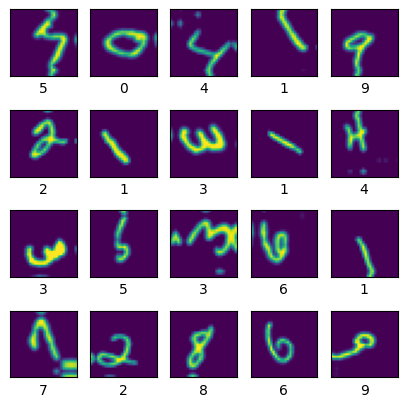

In [ ]:
# Affichage des 25 première images
plt.figure(figsize=[5,5])
for i in range (20):    # for first 20 images
  plt.subplot(4, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prétraitement des données
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
test_images = test_images/255
shape_train = train_images.shape

num_pixels = 28 * 28 #784

train_images = train_images.reshape(train_images.shape[0], num_pixels)
test_images = test_images.reshape(test_images.shape[0], num_pixels)

num_classes = 10

In [ ]:
# shuffle des data
ns =  train_images.shape[0] #number of examples
np.random.seed()
shuffle_index = np.random.permutation(ns)
train_images, train_labels = train_images[shuffle_index,:], train_labels[shuffle_index,]
#

# Premeier Model

In [ ]:
# Création du model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dropout(.3))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 850,586 (3.24 MB)

 Trainable params: 850,586 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entraiement du model
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=600)

scores = model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.2084 - loss: 2.1673 - val_accuracy: 0.4418 - val_loss: 1.6277
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.4543 - loss: 1.5905 - val_accuracy: 0.5757 - val_loss: 1.2409
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.5935 - loss: 1.2313 - val_accuracy: 0.6213 - val_loss: 1.1382
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6625 - loss: 1.0190 - val_accuracy: 0.6164 - val_loss: 1.1645
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7122 - loss: 0.8841 - val_accuracy: 0.7765 - val_loss: 0.6920
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7592 - loss: 0.7456 - val_accuracy: 0.7935 - val_loss: 0.6472
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.7823 - loss: 0.6658 - val_accuracy: 0.8091 - val_loss: 0.6054
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8136 - loss: 0.5753 - val_acc

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


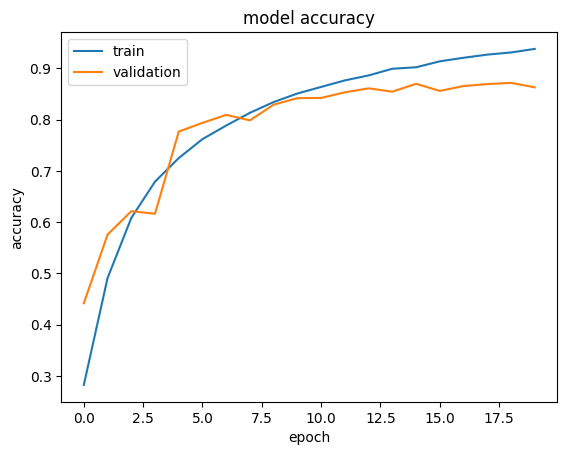

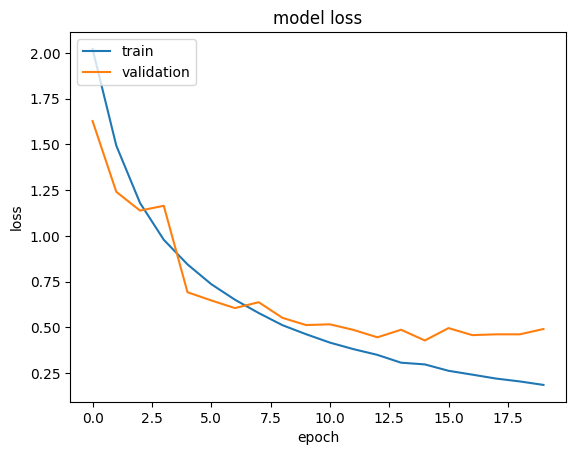

In [ ]:

# plot the history
#
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Predictoin
prediction = model.predict(train_images)
print(prediction)
pred_uni = np.argmax(prediction, axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
[[4.08250180e-08 5.58479174e-12 2.96995731e-05 ... 2.05416590e-08
  2.82818995e-08 3.19815641e-09]
 [5.05141259e-07 6.51261445e-09 5.49080782e-04 ... 1.91060110e-07
  9.99371350e-01 4.80336803e-06]
 [1.31399594e-14 4.00174095e-11 5.35252695e-07 ... 9.99997199e-01
  1.38604891e-11 2.28038994e-06]
 ...
 [4.02309932e-03 6.95803436e-03 5.17405244e-03 ... 2.82600243e-03
  6.34799659e-01 1.86270196e-02]
 [4.04064480e-07 2.54391807e-07 5.39096596e-04 ... 9.99242902e-01
  4.83862550e-09 1.08044012e-04]
 [8.35520041e-05 7.68525155e-09 1.48635436e-05 ... 8.22907823e-05
  5.37482963e-04 2.05938928e-02]]


[Text(0.5, 80.7222222222222, 'reel'), Text(95.72222222222221, 0.5, 'predit')]

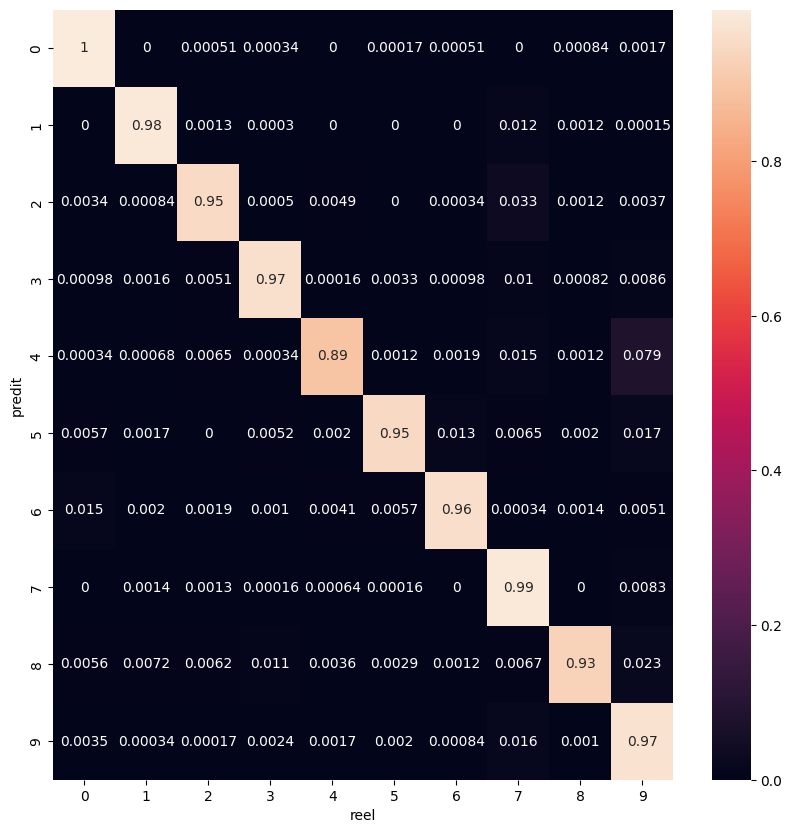

In [ ]:
# Matrice de confusion
plt.figure(figsize=(10, 10))
ax = sns.heatmap(confusion_matrix(train_labels, pred_uni, normalize="true"), annot=True)
ax.set(xlabel="reel", ylabel="predit")

In [ ]:
# Sauvegarde des Poids
model.save('poids_fully_87.h5')

# Deuxieme Model

In [ ]:
# Création du model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrainemenr du module
history = model.fit(train_images, train_labels, batch_size=600, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(600, 784), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (600, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(600, 784), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Fonction pour créer le modèle
def create_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [ ]:
# Cross Validation
kf = KFold(n_splits=5)  # Utiliser 5 folds

# Stocker les résultats pour chaque fold
fold_accuracies = []
fold_histories = []

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold accuracy: 85.08%
Fold accuracy: 82.01%
Fold accuracy: 77.94%
Fold accuracy: 84.04%
Fold accuracy: 83.04%
Mean accuracy across folds: 82.42%


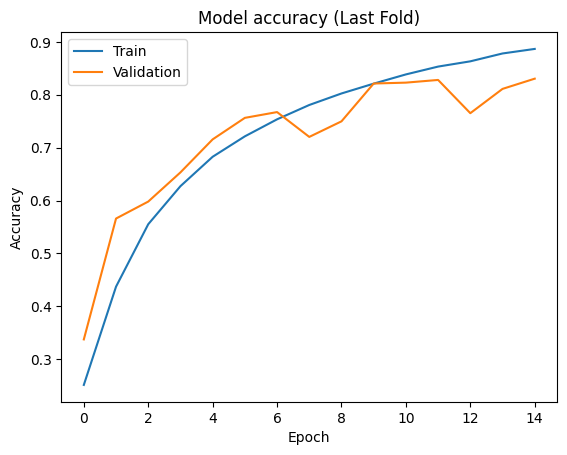

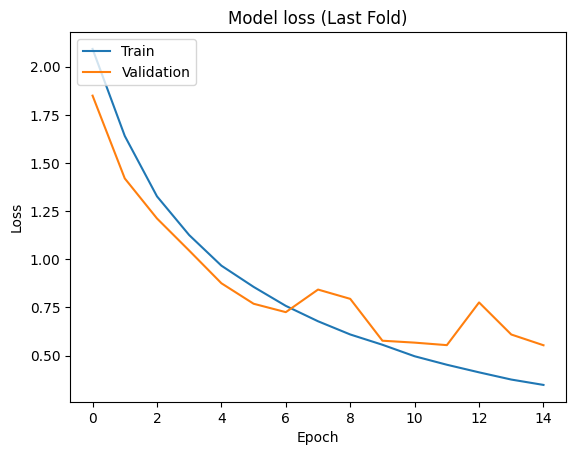

In [ ]:
# Boucle pour chaque fold
fold_no = 1  # Numéro du fold

for train_index, val_index in kf.split(train_images):
    X_train, X_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # Créer un nouveau modèle pour chaque fold
    model = create_model()

    # Entraîner le modèle
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=600, verbose=0)

    # Évaluer sur les données de validation
    scores = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold_no} accuracy: {scores[1] * 100:.2f}%")

    # Stocker l'accuracy et l'historique du fold
    fold_accuracies.append(scores[1] * 100)
    fold_histories.append(history)

    # Tracer les courbes pour ce fold
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Fold {fold_no} - Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Fold {fold_no} - Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Afficher les graphes pour le fold actuel
    plt.show()

    # Incrémenter le numéro du fold
    fold_no += 1

# Afficher la performance moyenne des folds
print(f"Mean accuracy across folds: {np.mean(fold_accuracies):.2f}%")